In [4]:
!pip install statsmodels datetime yfinance pandas_ta pandas_datareader

  Using cached statsmodels-0.14.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached DateTime-5.4-py3-none-any.whl.metadata (33 kB)
  Using cached yfinance-0.2.33-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pandas_ta-0.3.14b.tar.gz (115 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 5.5 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 3.8 MB/s eta 0:00:000:0100:01m
  

In [69]:
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import yfinance as yf
import pandas_ta
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

In [73]:
sp500=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
sp500['Symbol']=sp500['Symbol'].str.replace('.','-')
symbols_list=sp500['Symbol'].unique().tolist()

end_date='2023-12-31'

start_date=pd.to_datetime(end_date)-pd.DateOffset(365*8)
df=yf.download(tickers=symbols_list,
              start=start_date,
              end=end_date).stack()
df

In [75]:
df.index.names=['date','ticker']

In [76]:
df.columns=df.columns.str.lower()
df

adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134422   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095455   40.910000   41.349998   40.299999   41.290001   
           AAPL     24.323219   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.778080   57.610001   58.320000   56.400002   58.060001   
           ABT      36.956303   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-01-04 A         3287300.0         -0.001893        NaN       NaN   
           AAL      12037200.0         -0.000821        NaN       NaN   
           AAPL    270597600.0         -0.000565        NaN       NaN   
           ABBV     10308400.0         -0.047666        NaN       NaN   
           ABT      12227500.0         -0.010932        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.324469  4.756323   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.638671  3.611585   
           ZTS       1007200.0          0.000035  66.737233  5.186448   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-01-04 A            NaN       NaN       NaN       NaN     125.359286  
           AAL          NaN       NaN       NaN       NaN     470.599813  
           AAPL         NaN       NaN       NaN       NaN    6581.804767  
           ABBV         NaN       NaN       NaN       NaN     420.356760  
           ABT          NaN       NaN       NaN       NaN     451.883191  
...                     ...       ...       ...       ...            ...  
2023-12-29 YUM     4.824633  4.824633 -0.073239  0.784240     156.373892  
           ZBH     4.756323  4.756323 -1.054422  0.940596     103.396317  
           ZBRA    5.415905  5.415905 -0.154931  1.577769      68.687826  
           ZION    3.611585  3.611585  0.177122  1.943748      62.321720  
           ZTS     5.186448  5.186448  0.420520  2.133384     198.791059  

[994508 rows x 14 columns]

In [27]:
df['garman_klass_vol'] = ((np. log(df[ 'high'])-np.log(df['low']))**2)/2-(2*np.log(2) -1)*((np.log(df['adj close']) -np. log(df[ 'open']))**2)
df['rsi']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))

<Axes: xlabel='date'>

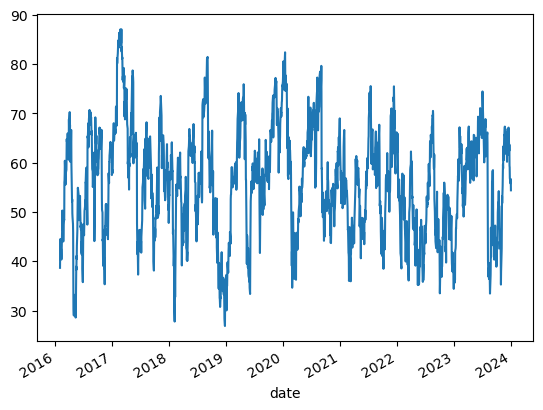

In [29]:
df

In [36]:
df['bb_low']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x),length=20).iloc[:,0])

df['bb_mid']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x),length=20).iloc[:,0])

df['bb_high']=df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x),length=20).iloc[:,0])
df

adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134422   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095455   40.910000   41.349998   40.299999   41.290001   
           AAPL     24.323219   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.778080   57.610001   58.320000   56.400002   58.060001   
           ABT      36.956303   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-01-04 A         3287300.0         -0.001893        NaN       NaN   
           AAL      12037200.0         -0.000821        NaN       NaN   
           AAPL    270597600.0         -0.000565        NaN       NaN   
           ABBV     10308400.0         -0.047666        NaN       NaN   
           ABT      12227500.0         -0.010932        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.324469  4.756323   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.638671  3.611585   
           ZTS       1007200.0          0.000035  66.737233  5.186448   

                     bb_mid   bb_high  
date       ticker                      
2016-01-04 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-12-29 YUM     4.824633  4.824633  
           ZBH     4.756323  4.756323  
           ZBRA    5.415905  5.415905  
           ZION    3.611585  3.611585  
           ZTS     5.186448  5.186448  

[994508 rows x 11 columns]

In [64]:
def compute_atr(stock_data):
    atr=pandas_ta.atr(high=stock_data['high'],
              low=stock_data['low'],
              close=stock_data['close'],
              lenth=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr']=df.groupby(level=1,group_keys=False).apply(compute_atr)
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df



adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134422   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095455   40.910000   41.349998   40.299999   41.290001   
           AAPL     24.323219   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.778080   57.610001   58.320000   56.400002   58.060001   
           ABT      36.956303   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-01-04 A         3287300.0         -0.001893        NaN       NaN   
           AAL      12037200.0         -0.000821        NaN       NaN   
           AAPL    270597600.0         -0.000565        NaN       NaN   
           ABBV     10308400.0         -0.047666        NaN       NaN   
           ABT      12227500.0         -0.010932        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.324469  4.756323   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.638671  3.611585   
           ZTS       1007200.0          0.000035  66.737233  5.186448   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-01-04 A            NaN       NaN       NaN       NaN     125.359286  
           AAL          NaN       NaN       NaN       NaN     470.599813  
           AAPL         NaN       NaN       NaN       NaN    6581.804767  
           ABBV         NaN       NaN       NaN       NaN     420.356760  
           ABT          NaN       NaN       NaN       NaN     451.883191  
...                     ...       ...       ...       ...            ...  
2023-12-29 YUM     4.824633  4.824633 -0.073239  0.784240     156.373892  
           ZBH     4.756323  4.756323 -1.054422  0.940596     103.396317  
           ZBRA    5.415905  5.415905 -0.154931  1.577769      68.687826  
           ZION    3.611585  3.611585  0.177122  1.943748      62.321720  
           ZTS     5.186448  5.186448  0.420520  2.133384     198.791059  

[994508 rows x 14 columns]

In [65]:
def compute_macd (close) :
    macd = pandas_ta.macd(close=close,length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
df['macd']=df.groupby(level=1,group_keys=False)['adj close'].apply(compute_macd)

In [66]:
df

adj close       close        high         low        open  \
date       ticker                                                               
2016-01-04 A        38.134422   40.689999   41.189999   40.340000   41.060001   
           AAL      39.095455   40.910000   41.349998   40.299999   41.290001   
           AAPL     24.323219   26.337500   26.342501   25.500000   25.652500   
           ABBV     40.778080   57.610001   58.320000   56.400002   58.060001   
           ABT      36.956303   42.930000   44.049999   42.500000   43.939999   
...                       ...         ...         ...         ...         ...   
2023-12-29 YUM     130.660004  130.660004  131.250000  130.210007  130.410004   
           ZBH     121.699997  121.699997  122.400002  121.239998  121.459999   
           ZBRA    273.329987  273.329987  276.309998  272.769989  274.730011   
           ZION     43.869999   43.869999   44.650002   43.720001   44.650002   
           ZTS     197.369995  197.369995  198.009995  196.250000  196.679993   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-01-04 A         3287300.0         -0.001893        NaN       NaN   
           AAL      12037200.0         -0.000821        NaN       NaN   
           AAPL    270597600.0         -0.000565        NaN       NaN   
           ABBV     10308400.0         -0.047666        NaN       NaN   
           ABT      12227500.0         -0.010932        NaN       NaN   
...                        ...               ...        ...       ...   
2023-12-29 YUM       1196800.0          0.000030  59.338371  4.824633   
           ZBH        849600.0          0.000044  68.324469  4.756323   
           ZBRA       251300.0          0.000073  67.914673  5.415905   
           ZION      1420600.0          0.000102  62.638671  3.611585   
           ZTS       1007200.0          0.000035  66.737233  5.186448   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-01-04 A            NaN       NaN       NaN       NaN     125.359286  
           AAL          NaN       NaN       NaN       NaN     470.599813  
           AAPL         NaN       NaN       NaN       NaN    6581.804767  
           ABBV         NaN       NaN       NaN       NaN     420.356760  
           ABT          NaN       NaN       NaN       NaN     451.883191  
...                     ...       ...       ...       ...            ...  
2023-12-29 YUM     4.824633  4.824633 -0.073239  0.784240     156.373892  
           ZBH     4.756323  4.756323 -1.054422  0.940596     103.396317  
           ZBRA    5.415905  5.415905 -0.154931  1.577769      68.687826  
           ZION    3.611585  3.611585  0.177122  1.943748      62.321720  
           ZTS     5.186448  5.186448  0.420520  2.133384     198.791059  

[994508 rows x 14 columns]

In [67]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-02-29 A           91.918062   35.004204         -0.001914  48.107912   
           AAL        338.977809   39.288372         -0.000319  56.664348   
           AAPL      3599.234964   22.444927         -0.002094  48.335932   
           ABBV       357.006444   39.060570         -0.049102  47.896383   
           ABT        245.865704   33.559803         -0.009363  47.035003   
...                          ...         ...               ...        ...   
2023-12-31 YUM        207.539266  130.660004          0.000030  59.338371   
           ZBH        208.043150  121.699997          0.000044  68.324469   
           ZBRA        98.037275  273.329987          0.000073  67.914673   
           ZION       102.724363   43.869999          0.000102  62.638671   
           ZTS        335.154638  197.369995          0.000035  66.737233   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-02-29 A       3.522493  3.522493  3.522493 -0.932886 -0.240043  
           AAL     3.547833  3.547833  3.547833  0.977081  0.529240  
           AAPL    3.119933  3.119933  3.119933 -1.017466 -0.326913  
           ABBV    3.638599  3.638599  3.638599 -0.477602 -0.288564  
           ABT     3.483741  3.483741  3.483741 -0.797320 -0.394514  
...                     ...       ...       ...       ...       ...  
2023-12-31 YUM     4.824633  4.824633  4.824633 -0.073239  0.784240  
           ZBH     4.756323  4.756323  4.756323 -1.054422  0.940596  
           ZBRA    5.415905  5.415905  5.415905 -0.154931  1.577769  
           ZION    3.611585  3.611585  3.611585  0.177122  1.943748  
           ZTS     5.186448  5.186448  5.186448  0.420520  2.133384  

[46953 rows x 9 columns]

In [68]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-01-31 AAL      42.760242         -0.000522  42.277611  3.789143   
           AAPL     28.640661         -0.001187  67.547709  3.346249   
           ABBV     45.380974         -0.029823  49.245602  3.814875   
           ABT      37.100910         -0.002947  66.811003  3.577130   
           ACN     104.991356         -0.002524  41.080233  4.664402   
...                       ...               ...        ...       ...   
2023-12-31 VRTX    406.890015          0.000028  65.899356  5.817492   
           VZ       37.700001          0.000041  57.985190  3.632663   
           WFC      49.220001          0.000025  67.159675  3.800094   
           WMT     157.649994          0.000017  52.372668  5.018094   
           XOM      99.980003          0.000041  42.092242  4.594084   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2017-01-31 AAL     3.789143  3.789143  1.295678 -0.163934  
           AAPL    3.346249  3.346249 -1.191554 -0.103906  
           ABBV    3.814875  3.814875 -1.207862 -0.322387  
           ABT     3.577130  3.577130 -1.167994  0.206062  
           ACN     4.664402  4.664402 -1.021878 -0.443328  
...                     ...       ...       ...       ...  
2023-12-31 VRTX    5.817492  5.817492  1.086119  3.205584  
           VZ      3.632663  3.632663 -1.182997  0.466400  
           WFC     3.800094  3.800094 -0.753985  1.822514  
           WMT     5.018094  5.018094 -0.005190 -0.274379  
           XOM     4.594084  4.594084  0.072672 -0.703744  

[12516 rows x 8 columns]